In [1]:
# Import seaborn 
import seaborn as sns

In [2]:
# Import constants from ggplot_helpers
from seaborn_helpers import *

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v02\setup\setup.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


In [3]:
# Check that dataframe loaded
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,53374,2024-03-24,Sunday,Simp,Atlanta FaZe,5,Rio,Search & Destroy,9,5,...,1,W,ATL,FaZe,OpTic Texas,TX,4,10,2,0
2652,53374,2024-03-24,Sunday,Dashy,OpTic Texas,5,Rio,Search & Destroy,5,7,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0
2653,53374,2024-03-24,Sunday,Kenny,OpTic Texas,5,Rio,Search & Destroy,4,9,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0
2654,53374,2024-03-24,Sunday,Pred,OpTic Texas,5,Rio,Search & Destroy,5,8,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0


In [67]:
# Player Kills Overview
def player_kills_overview(
        player_input: str, gamemode_input: str, cur_line: float, map_input = "All"
):
    # If user selected all maps
    if map_input == "All":

        # Filter data based on user inputs
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
            (cdlDF["player"] == player_input)]

    # User selected only one map
    else:

        # Filter data based on user inputs, including map
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
            (cdlDF["player"] == player_input) & \
            (cdlDF["map_name"] == map_input)]
        
    # Plot the boxplot
    p = sns.catplot(filtered_df, y =  "kills", kind = "box")

    return p

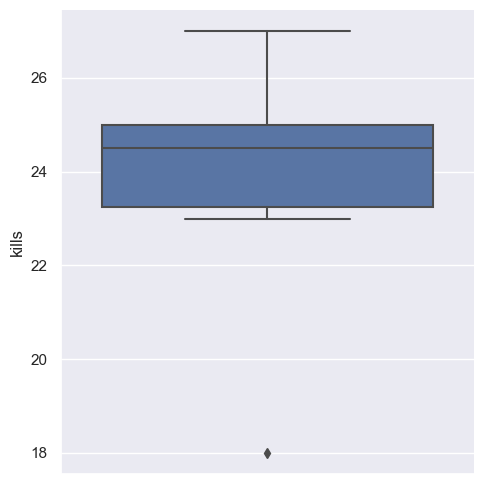

In [69]:
player_kills_overview("Kenny", "Hardpoint", 21, "Rio")

In [62]:
def team_score_diffs(team_input: str, gamemode_input: str, map_input = "All"):

    # If user selected all maps    
    if map_input == "All":
    
        # Filter data based on user inputs
        filtered_df = \
        cdlDF[(cdlDF['gamemode'] == gamemode_input) & \
                (cdlDF['team'] == team_input)] \
                [['match_id', 'map_name', 'score_diff']].drop_duplicates()

        # Plot the faceted histogram
        p = sns.displot(
            data = filtered_df,  x = "score_diff", col = "map_name", col_wrap = 3,
            binwidth = gamemode_binwidths[gamemode_input], height = 3, facet_kws = dict(margin_titles=True),
            )
        
        # Title
        p.figure.suptitle(f"{team_input} Score Differentials: {gamemode_input}")

        # Set facet titles
        p.set_titles("{col_name}")
    
    # User selected only one map 
    else:

        # Filter data based on user inputs, including map
        filtered_df = \
        cdlDF[(cdlDF['gamemode'] == gamemode_input) & \
                (cdlDF['team'] == team_input) & \
                (cdlDF["map_name"] == map_input)] \
                [['match_id', 'map_name', 'score_diff']].drop_duplicates()

        # Plot the histogram
        p = sns.displot(
            data = filtered_df, x = "score_diff", 
            binwidth = gamemode_binwidths[gamemode_input]
            )
        
        # Title
        p.figure.suptitle(f"{team_input} Score Differentials: {map_input} {gamemode_input}")
        
    # Set axis labels 
    p.set_axis_labels("Score Differential", "Count")

    # Move title up
    p.figure.subplots_adjust(top = 0.9)
        
    return p

In [24]:
# Set seaborn theme
sns.set_theme(style = "darkgrid")

c:\Users\David Harler Jr\anaconda3\envs\PythonData\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


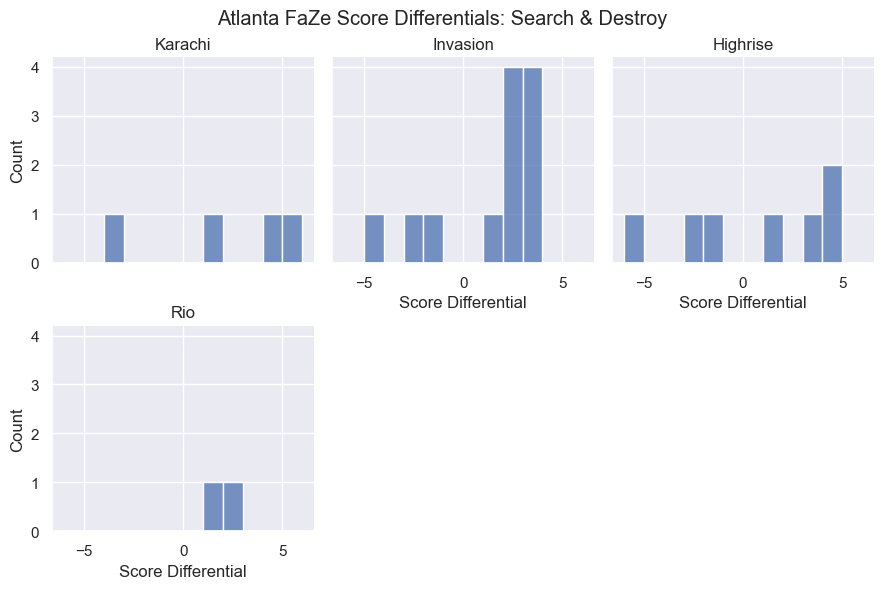

In [63]:
team_score_diffs("Atlanta FaZe", "Search & Destroy", "All")

c:\Users\David Harler Jr\anaconda3\envs\PythonData\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


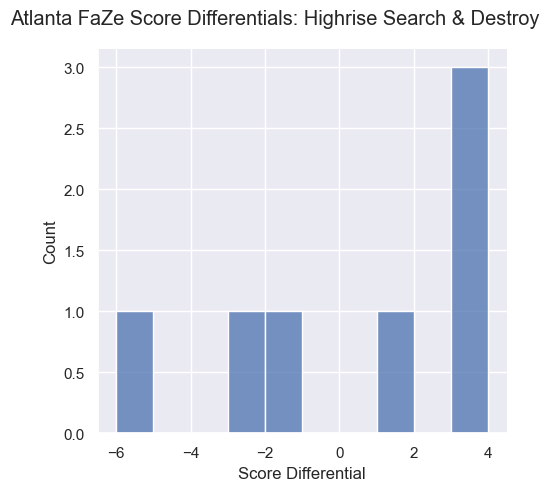

In [64]:
team_score_diffs("Atlanta FaZe", "Search & Destroy", "Highrise")